<a href="https://colab.research.google.com/github/Yuji-github/Kaggle-Survey/blob/main/kagglesurvey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

#### I believe that visualization is one of the important methods for a Data Scientist, however, finding relationships from the given dataset is more important.   
#### Otherwise, readers can get misled or they do not get any useful information at all. This is a big no-no as the Data Scientist.   
#### I want to introduce how to find relationships from categorical datasets, visualize them, then, analysis them.

# Explore Datasets 

## Import datasets and check the data types such as numerical or categorical types.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv")
df.head(3)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


#### The datasets are mostly categorical (nominal) types. So, we can NOT apply correlations for the datasets because (Pearson) correlations are for 2 numerical variables.  
#### I want to use different methods for categorical variables.

## Cramer's V  
    
#### *Cramér’s V is an effect size measurement for the chi-square test of independence. It measures how strongly two categorical fields are associated.*

In [ ]:
!pip install researchpy
import researchpy

#### We want to know the relationships between Gender and the Survey (other features)

In [ ]:
ES = np.zeros((len(df.columns), 2), dtype='O') # to store results [Feature Name, Cramer's V]
i = 0
gender = df['Q2'] # explore relationships among the features

for itr in df: 
    crosstab, res, fre = researchpy.crosstab(gender, df[itr], test='chi-square', expected_freqs= True)
    ES[i][0] = itr
    ES[i][1] = str(res.iloc[2, 1])
    i += 1

/opt/conda/lib/python3.7/site-packages/researchpy/crosstab.py:94: RuntimeWarning: invalid value encountered in true_divide
  V = numpy.sqrt(test_val / (n * min((num_row - 1), (num_col - 1))))


### Interpretation of effect size of Cramer's V
#### 1. ES ≤ 0.2	The result is weak. Although the result is statistically significant, the fields are only weakly associated.
#### 1. 0.2 < ES ≤ 0.6	The result is moderate. The fields are moderately associated.
#### 1. ES > 0.6	The result is strong. The fields are strongly associated.

In [ ]:
ES

array([['Time from Start to Finish (seconds)', '0.5989'],
       ['Q1', '0.4496'],
       ['Q2', '1.0'],
       ['Q3', '0.4575'],
       ['Q4', '0.4489'],
       ['Q5', '0.45'],
       ['Q6', '0.4508'],
       ['Q7_Part_1', '1.0'],
       ['Q7_Part_2', '1.0'],
       ['Q7_Part_3', '1.0'],
       ['Q7_Part_4', '1.0'],
       ['Q7_Part_5', '1.0'],
       ['Q7_Part_6', '1.0'],
       ['Q7_Part_7', '1.0'],
       ['Q7_Part_8', '1.0'],
       ['Q7_Part_9', '1.0'],
       ['Q7_Part_10', '1.0'],
       ['Q7_Part_11', '1.0'],
       ['Q7_Part_12', '1.0'],
       ['Q7_OTHER', '1.0'],
       ['Q8', '0.4489'],
       ['Q9_Part_1', '1.0'],
       ['Q9_Part_2', '1.0'],
       ['Q9_Part_3', '1.0'],
       ['Q9_Part_4', '1.0'],
       ['Q9_Part_5', '1.0'],
       ['Q9_Part_6', '1.0'],
       ['Q9_Part_7', '1.0'],
       ['Q9_Part_8', '1.0'],
       ['Q9_Part_9', '1.0'],
       ['Q9_Part_10', '1.0'],
       ['Q9_Part_11', '1.0'],
       ['Q9_Part_12', '1.0'],
       ['Q9_OTHER', '1.0'],
       ['Q10_P

#### Some Cramer's V has 1 except for calculating itself (Gender) because Cramer's V works only for nominal variables.  
#### Thus, we need to modify some features such as Q7 to nominal. 

In [ ]:
list_q7 = [itr for itr in df.columns if 'Q7' in itr] # getting columns' names
list_q9 = [itr for itr in df.columns if 'Q9' in itr]
list_q10 = [itr for itr in df.columns if 'Q10' in itr]
list_q12 = [itr for itr in df.columns if 'Q12' in itr]
list_q14 = [itr for itr in df.columns if 'Q14' in itr]
list_q16 = [itr for itr in df.columns if 'Q16' in itr]
list_q17 = [itr for itr in df.columns if 'Q17' in itr]
list_q18 = [itr for itr in df.columns if 'Q18' in itr]
list_q19 = [itr for itr in df.columns if 'Q19' in itr]
list_q24 = [itr for itr in df.columns if 'Q24' in itr]
list_q27 = [itr for itr in df.columns if 'Q27' in itr]
list_q29 = [itr for itr in df.columns if 'Q29' in itr]
list_q30 = [itr for itr in df.columns if 'Q30' in itr]
list_q31 = [itr for itr in df.columns if 'Q31' in itr]
list_q32 = [itr for itr in df.columns if 'Q32' in itr]
list_q34 = [itr for itr in df.columns if 'Q34' in itr]
list_q36 = [itr for itr in df.columns if 'Q36' in itr]
list_q37 = [itr for itr in df.columns if 'Q37' in itr]
list_q38 = [itr for itr in df.columns if 'Q38' in itr]
list_q39 = [itr for itr in df.columns if 'Q39' in itr]
list_q40 = [itr for itr in df.columns if 'Q40' in itr]
list_q42 = [itr for itr in df.columns if 'Q42' in itr]

In [ ]:
Q7 = df[list_q7[0]] + ('_' + df[list_q7[1]]).fillna('') # concatenating the first and second columns vertically 
Q9 = df[list_q9[0]] + ('_' + df[list_q9[1]]).fillna('')
Q10 = df[list_q10[0]] + ('_' + df[list_q10[1]]).fillna('')
Q12 = df[list_q12[0]] + ('_' + df[list_q12[1]]).fillna('')
Q14 = df[list_q14[0]] + ('_' + df[list_q14[1]]).fillna('')
Q16 = df[list_q16[0]] + ('_' + df[list_q16[1]]).fillna('')
Q17 = df[list_q17[0]] + ('_' + df[list_q17[1]]).fillna('')
Q18 = df[list_q18[0]] + ('_' + df[list_q18[1]]).fillna('')
Q19 = df[list_q19[0]] + ('_' + df[list_q19[1]]).fillna('')
Q24 = df[list_q24[0]] + ('_' + df[list_q24[1]]).fillna('')
Q27 = df[list_q27[0]] + ('_' + df[list_q27[1]]).fillna('')
Q29 = df[list_q29[0]] + ('_' + df[list_q29[1]]).fillna('')
Q30 = df[list_q30[0]] + ('_' + df[list_q30[1]]).fillna('')
Q31 = df[list_q31[0]] + ('_' + df[list_q31[1]]).fillna('')
Q32 = df[list_q32[0]] + ('_' + df[list_q32[1]]).fillna('')
Q34 = df[list_q34[0]] + ('_' + df[list_q34[1]]).fillna('')
Q36 = df[list_q36[0]] + ('_' + df[list_q36[1]]).fillna('')
Q37 = df[list_q37[0]] + ('_' + df[list_q37[1]]).fillna('')
Q38 = df[list_q38[0]] + ('_' + df[list_q38[1]]).fillna('')
Q39 = df[list_q39[0]] + ('_' + df[list_q39[1]]).fillna('')   
Q40 = df[list_q40[0]] + ('_' + df[list_q40[1]]).fillna('')   
Q42 = df[list_q42[0]] + ('_' + df[list_q42[1]]).fillna('')   

In [ ]:
for itr in list_q7[2:]: # concatenaitng rest of the columns 
    Q7 = Q7 + ('_' + df[itr]).fillna('')
    
for itr in list_q9[2:]:
    Q9 = Q9 + ('_' + df[itr]).fillna('')
    
for itr in list_q10[2:]:
    Q10 = Q10 + ('_' + df[itr]).fillna('')

for itr in list_q12[2:]:
    Q12 = Q12 + ('_' + df[itr]).fillna('')
    
for itr in list_q14[2:]:
    Q14 = Q14 + ('_' + df[itr]).fillna('')
    
for itr in list_q16[2:]:
    Q16 = Q16 + ('_' + df[itr]).fillna('')
    
for itr in list_q17[2:]:
    Q17 = Q17 + ('_' + df[itr]).fillna('')
        
for itr in list_q18[2:]:
    Q18 = Q18 + ('_' + df[itr]).fillna('')
        
for itr in list_q19[2:]:
    Q19 = Q19 + ('_' + df[itr]).fillna('')
        
for itr in list_q24[2:]:
    Q24 = Q24 + ('_' + df[itr]).fillna('')
        
for itr in list_q27[2:]:
    Q27 = Q27 + ('_' + df[itr]).fillna('')
        
for itr in list_q29[2:]:
    Q29 = Q29 + ('_' + df[itr]).fillna('')
        
for itr in list_q30[2:]:
    Q30 = Q30 + ('_' + df[itr]).fillna('')
        
for itr in list_q31[2:]:
    Q31 = Q31 + ('_' + df[itr]).fillna('')
        
for itr in list_q32[2:]:
    Q32 = Q32 + ('_' + df[itr]).fillna('')
            
for itr in list_q34[2:]:
    Q34 = Q34 + ('_' + df[itr]).fillna('')
            
for itr in list_q36[2:]:
    Q36 = Q36 + ('_' + df[itr]).fillna('')
            
for itr in list_q37[2:]:
    Q37 = Q37 + ('_' + df[itr]).fillna('')
            
for itr in list_q38[2:]:
    Q38 = Q38 + ('_' + df[itr]).fillna('')
                
for itr in list_q39[2:]:
    Q39 = Q39 + ('_' + df[itr]).fillna('')
                
for itr in list_q40[2:]:
    Q40 = Q40 + ('_' + df[itr]).fillna('')
                
for itr in list_q42[2:]:
    Q42 = Q42 + ('_' + df[itr]).fillna('')

In [ ]:
list_all_q = [[Q7, Q9, Q10, Q12, Q14, Q16, Q17, Q18, Q19, Q24, Q27, Q29, Q30, Q31, Q32, Q34, Q36, Q37, Q38, Q39, Q40, Q42]] # for the loop
name_all_q = ['Q7', 'Q9', 'Q10', 'Q12', 'Q14', 'Q16', 'Q17', 'Q18', 'Q19', 'Q24', 'Q27', 'Q29', 'Q30', 'Q31', 'Q32', 'Q34', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q42']

for itr in range (len(list_all_q[0])): 
    
    crosstab, res, fre = researchpy.crosstab(gender, list_all_q[0][itr], test='chi-square', expected_freqs= True)
    i = 0
    
    for itr2 in ES[:, 0]: # updating ES values        
        if name_all_q[itr] in itr2:
            ES[i][1] = str(res.iloc[2, 1])            
        i +=1

#### Now, we can see what columns/features are related to Gender.

In [ ]:
ES

array([['Time from Start to Finish (seconds)', '0.5989'],
       ['Q1', '0.4496'],
       ['Q2', '1.0'],
       ['Q3', '0.4575'],
       ['Q4', '0.4489'],
       ['Q5', '0.45'],
       ['Q6', '0.4508'],
       ['Q7_Part_1', '0.4904'],
       ['Q7_Part_2', '0.4904'],
       ['Q7_Part_3', '0.4904'],
       ['Q7_Part_4', '0.4904'],
       ['Q7_Part_5', '0.4904'],
       ['Q7_Part_6', '0.4904'],
       ['Q7_Part_7', '0.4904'],
       ['Q7_Part_8', '0.4904'],
       ['Q7_Part_9', '0.4904'],
       ['Q7_Part_10', '0.4904'],
       ['Q7_Part_11', '0.4904'],
       ['Q7_Part_12', '0.4904'],
       ['Q7_OTHER', '0.4904'],
       ['Q8', '0.4489'],
       ['Q9_Part_1', '0.5623'],
       ['Q9_Part_2', '0.5623'],
       ['Q9_Part_3', '0.5623'],
       ['Q9_Part_4', '0.5623'],
       ['Q9_Part_5', '0.5623'],
       ['Q9_Part_6', '0.5623'],
       ['Q9_Part_7', '0.5623'],
       ['Q9_Part_8', '0.5623'],
       ['Q9_Part_9', '0.5623'],
       ['Q9_Part_10', '0.5623'],
       ['Q9_Part_11', '0.5623'],


### Results  
#### From Cramer's V, we can see Q32, 34, 36, 38, 39 are strongly associated with Gender.

## Visualizations and Analysis

#### Gender vs Q32 (Big data products (relational databases, data warehouses, data lakes, or similar))

In [ ]:
contTable = pd.crosstab(Q32, gender)
contTable[:len(contTable)-1].sort_values(by=['Man', 'Woman'], ascending=False) # we will ignore minority genders as very small numbers

Q2,Man,Nonbinary,Prefer not to say,Prefer to self-describe,What is your gender? - Selected Choice,Woman
row_0,,,,,,
MySQL,538,1,6,0,0,126
MySQL _SQLite,142,2,1,0,0,17
MySQL _PostgreSQL,127,0,2,0,0,27
MySQL _MongoDB,119,0,0,0,0,28
MySQL _Microsoft SQL Server,87,0,1,1,0,22
...,...,...,...,...,...,...
MySQL _PostgreSQL _SQLite _Oracle Database _MongoDB _Microsoft Azure SQL Database _Google Cloud BigQuery,0,0,1,0,0,0
MySQL _SQLite _Microsoft SQL Server _Snowflake _Google Cloud BigQuery _Google Cloud SQL,0,0,1,0,0,0
MySQL _SQLite _MongoDB _Microsoft SQL Server _Other,0,1,0,0,0,0


#### From the table, we can know:  
* MySQL looks like the main tool for both of them, and people select MySQL + something.
* Both genders prefer to use MySQL for big data products on a regular basis. 
* Interestingly, Women less choose multiple tools such as MySQL and SQLite. 
* On the other hand, Men select multiple tools for big data products on a regular basis and hope to become more familiar with them in the next 2 years.

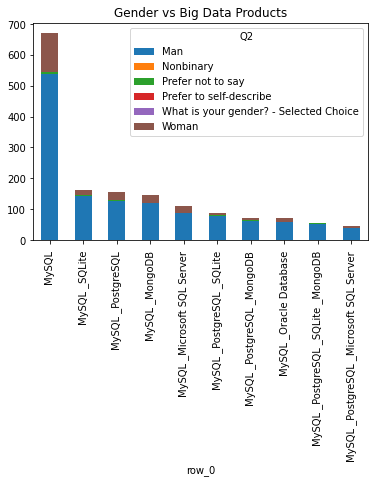

In [ ]:
contTable[:len(contTable)-1].sort_values(by=['Man', 'Woman'], ascending=False).head(10).plot(kind='bar', stacked=True)
plt.title('Gender vs Big Data Products')
plt.show()

#### From the stacked bar chart, we can know:   
* With more than 2 combinations of tools, Men's property is getting larger. 
* Most people regardless of gender, prefer 1 or 2 tools to use for big data products. 
* Especially, Women prefer at most 2 tools for the big data prodcuts.

#### Gender vs Q34 (Business intelligence tools)  
#### Before we can start visualization and analysis, we can assume that Men's prefer multiple tools to use for business intelligence as we know that Men prefer more tools for big data. 

In [ ]:
contTable2 = pd.crosstab(Q34, gender)
contTable2[:len(contTable2)-1].sort_values(by=['Man', 'Woman'], ascending=False)

Q2,Man,Prefer not to say,Prefer to self-describe,What is your gender? - Selected Choice,Woman
row_0,,,,,
Amazon QuickSight,46,2,0,0,10
Amazon QuickSight_Tableau,15,1,0,0,4
Amazon QuickSight_Microsoft Power BI_Tableau,15,0,0,0,1
Amazon QuickSight_Google Data Studio,10,0,1,0,2
Amazon QuickSight_Microsoft Power BI_Google Data Studio_Looker_Tableau_Salesforce_Tableau CRM_Qlik_Domo_TIBCO Spotfire_Alteryx _Sisense _SAP Analytics Cloud _Microsoft Azure Synapse _Thoughtspot,9,0,0,0,4
...,...,...,...,...,...
Amazon QuickSight_Tableau_Qlik,0,0,0,0,1
Amazon QuickSight_Google Data Studio_Tableau_Salesforce_Tableau CRM_Microsoft Azure Synapse,0,1,0,0,0
Amazon QuickSight_Microsoft Power BI_Google Data Studio_Looker_Tableau_Tableau CRM_Sisense,0,1,0,0,0


#### From the table, we can know:  
* Our assumption is correct. (looks like) 
* Men desire to get Business Intelligence tools as much as they want. 
* On the other hand, Women did not attend to answer this question. Maybe, they have less chance to use business tools on a regular basis. 
* We can conclude that still Women are not given equal opportunities to join business situations.

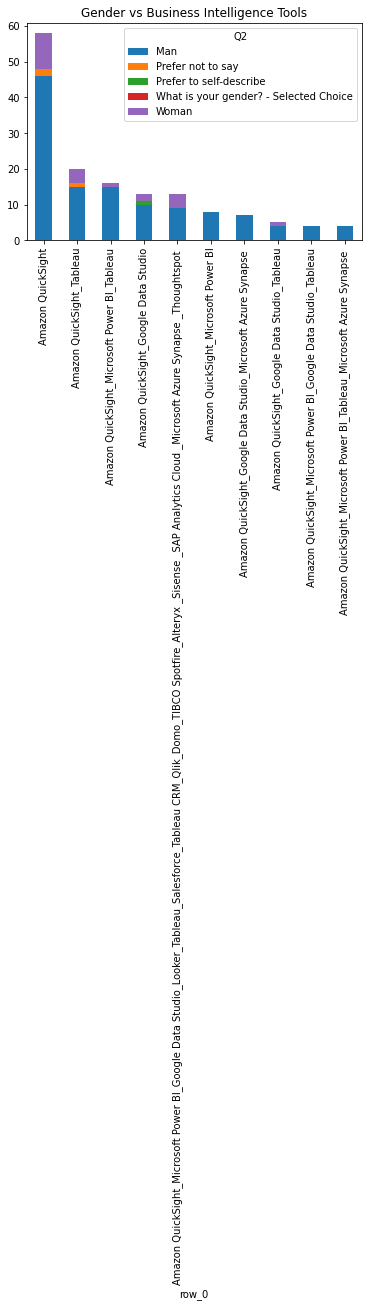

In [ ]:
contTable2[:len(contTable2)-1].sort_values(by=['Man', 'Woman'], ascending=False).head(10).plot(kind='bar', stacked=True)
plt.title('Gender vs Business Intelligence Tools')
plt.show()

#### From the stacked bar chart, we can know: 
* Both genders do not use Business Intelligence tools when we compare with the big data products tools such as MySQL.
* On the other hand, both genders prefer Amazon QuickSight, and it looks like the most popular tool. 
* People select Amazon QuickSight + other Business Intelligence tools. 
* Surprisingly, half of the women (compare to men) also want to use the Business Intelligence tools as much they want.

#### Gender vs Q36 (Automated Machine Learnig tools)  
#### We can keep assuming that Men's prefer more tools than Women.

In [ ]:
contTable3 = pd.crosstab(Q36, gender)
contTable3[:len(contTable3)-1].sort_values(by=['Man', 'Woman'], ascending=False)

Q2,Man,Nonbinary,Prefer not to say,Prefer to self-describe,What is your gender? - Selected Choice,Woman
row_0,,,,,,
"Automated data augmentation (e.g. imgaug, albumentations)",305,0,6,0,0,46
"Automated data augmentation (e.g. imgaug, albumentations)_Automated feature engineering/selection (e.g. tpot, boruta_py)_Automated model selection (e.g. auto-sklearn, xcessiv)_Automated model architecture searches (e.g. darts, enas)_Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)_Automation of full ML pipelines (e.g. Google AutoML, H2O Driverless AI)",96,0,0,0,0,9
"Automated data augmentation (e.g. imgaug, albumentations)_Automated feature engineering/selection (e.g. tpot, boruta_py)",67,0,2,0,0,7
"Automated data augmentation (e.g. imgaug, albumentations)_Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)",59,0,0,0,0,4
"Automated data augmentation (e.g. imgaug, albumentations)_Automated model selection (e.g. auto-sklearn, xcessiv)",47,0,0,0,0,7
"Automated data augmentation (e.g. imgaug, albumentations)_Automated feature engineering/selection (e.g. tpot, boruta_py)_Automated model selection (e.g. auto-sklearn, xcessiv)",33,0,2,0,0,4
"Automated data augmentation (e.g. imgaug, albumentations)_Automation of full ML pipelines (e.g. Google AutoML, H2O Driverless AI)",29,0,0,1,0,5
"Automated data augmentation (e.g. imgaug, albumentations)_Automated model selection (e.g. auto-sklearn, xcessiv)_Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)",23,0,0,0,0,1
"Automated data augmentation (e.g. imgaug, albumentations)_Automated feature engineering/selection (e.g. tpot, boruta_py)_Automated model selection (e.g. auto-sklearn, xcessiv)_Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)",22,0,0,0,0,2


#### From the table, we can know: 
* Men are widely spread to use automated machine learning tools. 
* Women are mainly using one particular automated machine learning tool that is Automated data augmentation. 
* Men use all automated machine learning tools (the second highest), this is very unique results. 

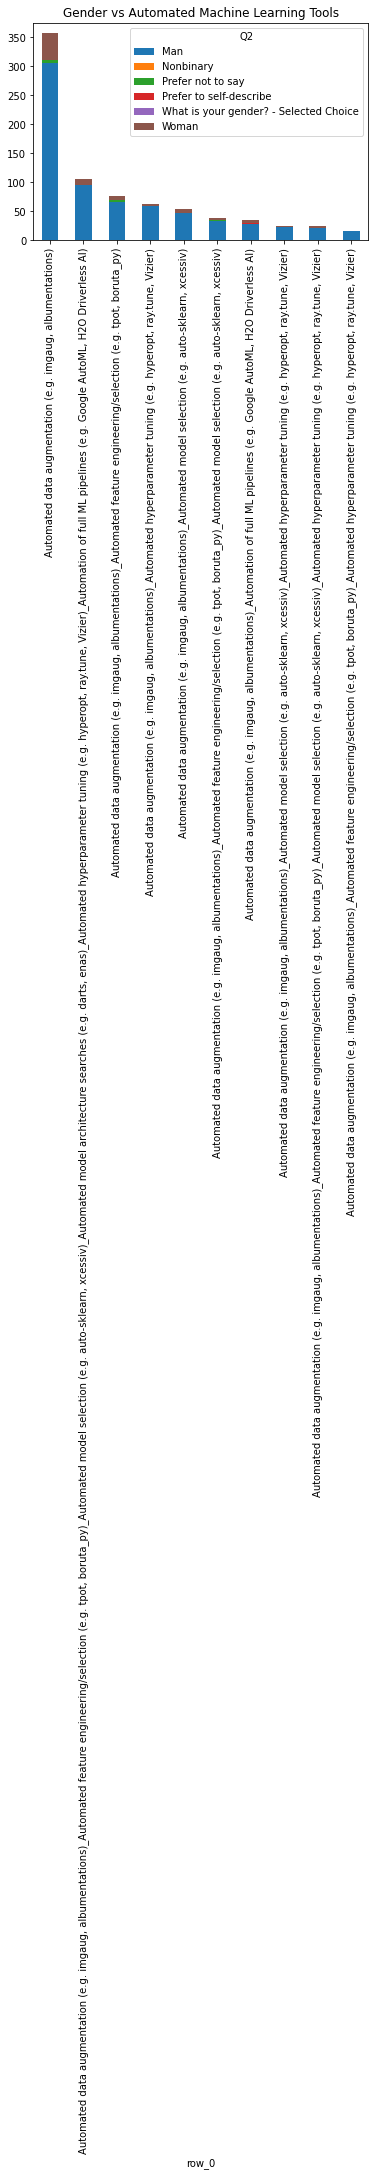

In [ ]:
contTable3[:len(contTable3)-1].sort_values(by=['Man', 'Woman'], ascending=False).head(10).plot(kind='bar', stacked=True)
plt.title('Gender vs Automated Machine Learning Tools')
plt.show()

#### From the stacked bar chart, we can know: 
* Women are less involved to use automated machine learning tools.
* Automated data augmentation is the most popular tool for both genders.
* The chart shows that men are widely spread to use automated machine learning tools. 
* Men prefer to use automated machine learning tools as much as they want.

#### Gender vs Q38 (Machine Learning Experiments)  

In [ ]:
contTable4 = pd.crosstab(Q38, gender)
contTable4[:len(contTable4)-1].sort_values(by=['Man', 'Woman'], ascending=False)

Q2,Man,Nonbinary,Prefer not to say,What is your gender? - Selected Choice,Woman
row_0,,,,,
Neptune.ai,47,0,1,0,5
Neptune.ai _ TensorBoard,22,1,0,0,3
Neptune.ai _ TensorBoard _ MLflow,18,0,0,0,0
Neptune.ai _ Weights & Biases _ Comet.ml _ Sacred + Omniboard _ TensorBoard _ Guild.ai _ Polyaxon _ ClearML _ Domino Model Monitor _ MLflow,15,0,0,0,5
Neptune.ai _ MLflow,10,0,1,0,1
Neptune.ai _ Weights & Biases,9,0,0,0,0
Neptune.ai _ Weights & Biases _ TensorBoard,8,0,1,0,0
Neptune.ai _ Weights & Biases _ TensorBoard _ MLflow,6,0,0,0,0
Neptune.ai _ Comet.ml,3,0,0,0,0


#### From the table, we can know: 
* Mainly Men use tools to help manage machine learning experiments. 
* Women are almost not getting involved in this opportunity. 
* Men want to use more than 2 tools for this.
* Neptune.ai is the most popular.

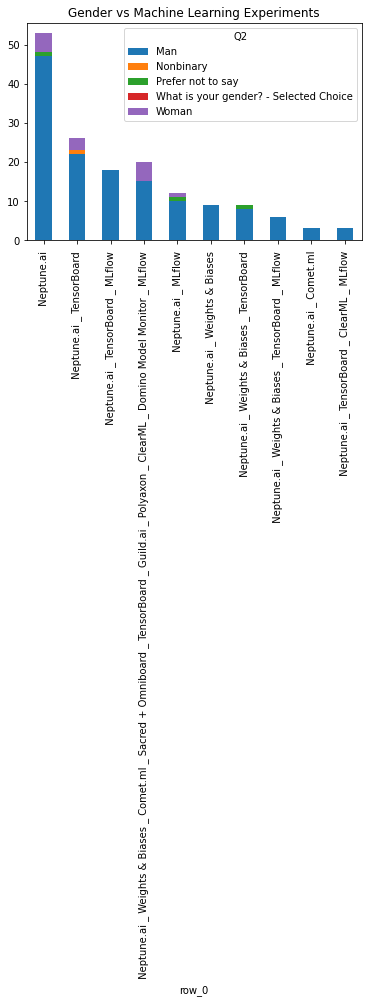

In [ ]:
contTable4[:len(contTable4)-1].sort_values(by=['Man', 'Woman'], ascending=False).head(10).plot(kind='bar', stacked=True)
plt.title('Gender vs Machine Learning Experiments')
plt.show()

#### From the stacked bar chart, we can know: 
* Using one tool (Neptune.ai) is popular for both genders.
* This is also people want to use the tools as much as they want. 

### Now(Q32, 34, 36, 38), we have realized that the most popular selection is always at the top of the list. The order might navigate people to select somehow.

#### Gender vs Q39 (Data Analysis/Machine Learning Applications)

#### We can assume that Men's prefer multiple tools, and the most popular tool is at the top of the list.

In [ ]:
contTable5 = pd.crosstab(Q39, gender)
contTable5[:len(contTable5)-1].sort_values(by=['Man', 'Woman'], ascending=False)

Q2,Man,Nonbinary,Prefer not to say,Prefer to self-describe,What is your gender? - Selected Choice,Woman
row_0,,,,,,
Plotly Dash,29,0,1,0,0,5
Plotly Dash _ GitHub _ Kaggle,26,0,0,0,0,1
Plotly Dash _ GitHub,20,0,0,0,0,4
Plotly Dash _ GitHub _ Kaggle _ Colab,16,0,0,0,0,6
Plotly Dash _ Streamlit _ NBViewer _ GitHub _ Personal blog _ Kaggle _ Colab _ Shiny,14,0,0,0,0,4
...,...,...,...,...,...,...
Plotly Dash _ Streamlit _ Personal blog,1,0,0,0,0,0
Plotly Dash _ Kaggle _ Colab _ Shiny,0,0,0,0,0,1
Plotly Dash _ NBViewer _ GitHub,0,0,0,0,0,1


#### From the table, we can know: 
* Men want to share the applications at Plotly Dash, GitHub, and Kaggle. 
* Women almost do not share the application at Plotly Dash, GitHub, and Kaggle. 
* Plotly Dash or GitHub is popular (individually), but Plotly Dash and GitHub are 3rd popular. 
* Men want to share applications in different places. 

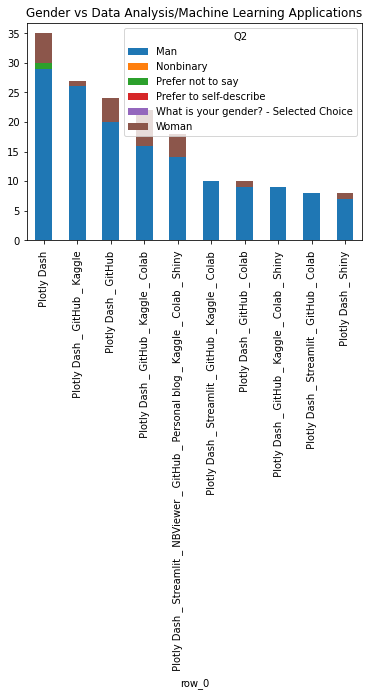

In [ ]:
contTable5[:len(contTable5)-1].sort_values(by=['Man', 'Woman'], ascending=False).head(10).plot(kind='bar', stacked=True)
plt.title('Gender vs Data Analysis/Machine Learning Applications')
plt.show()

#### From the stacked bar chart, we can know: 
* Women prefer to share applications at Plotly Dash, GitHub, Kaggle, and Colab or only Plotly Dash. 
* There are a few gaps between a single area and multiple areas where they want to share. Thus, people share applications more multiple areas. 

### Also, the tip of the list item was the most popular. So, we want to suggest the change order for the next survey. 

# Conclusion

#### Visualization is one of the most important methods for a Data Scientist.  
#### However, finding relationships are more important as we can extract useful information from them.   
#### This is also able to reduce the number of plots. So, readers are easy to get on the same page.   
#### Moreover, we can find a lot of new ideas by exploring datasets with correlations. 